In [1]:
#pip install xgboost

In [4]:
#pip install catboost

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize

In [8]:
df=pd.read_csv('Spam Email Detection - spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df['v1'] = df['v1'].map({'spam': 1, 'ham': 0})

X = df['v2']
y = df['v1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

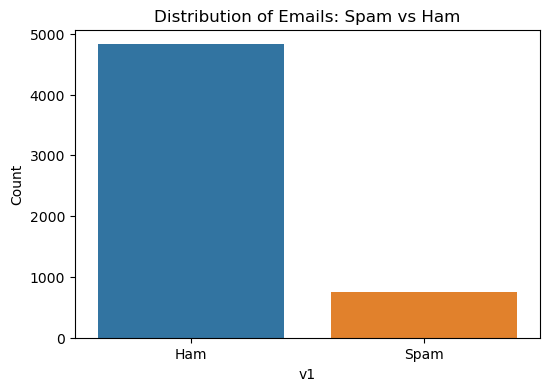

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Emails: Spam vs Ham')
plt.xlabel('v1')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

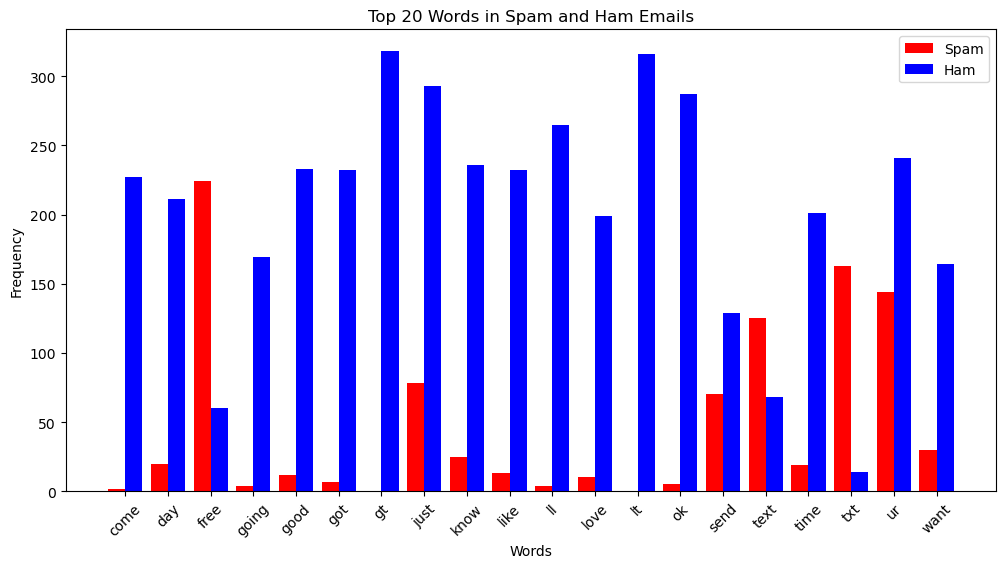

In [25]:
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X_counts = vectorizer.fit_transform(df['v2'])

spam_df = df[df['v1'] == 1]
ham_df = df[df['v1'] == 0]

spam_counts = vectorizer.transform(spam_df['v2']).toarray().sum(axis=0)
ham_counts = vectorizer.transform(ham_df['v2']).toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()
x = np.arange(len(words))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, spam_counts, width=0.4, label='Spam', color='red')
plt.bar(x + 0.2, ham_counts, width=0.4, label='Ham', color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Spam and Ham Emails')
plt.xticks(ticks=x, labels=words, rotation=45)
plt.legend()
plt.show()

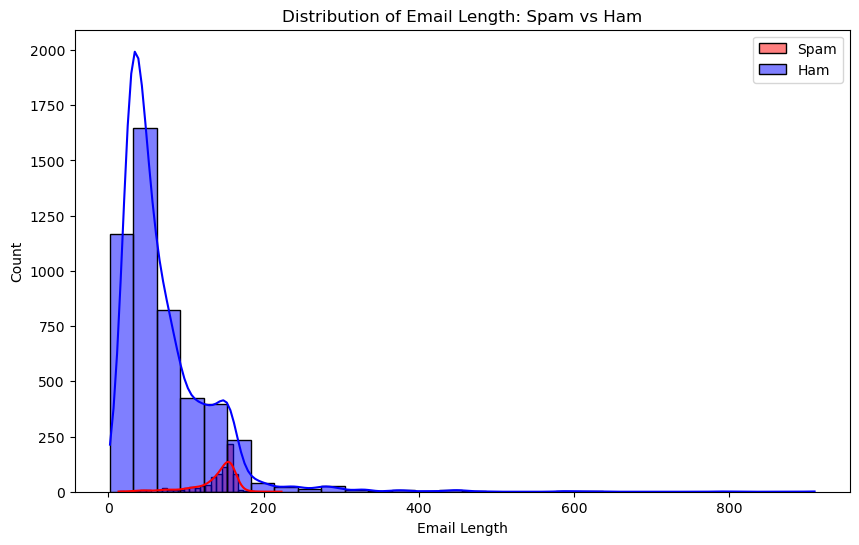

In [27]:
df['Email Length'] = df['v2'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['v1'] == 1]['Email Length'], color='red', kde=True, label='Spam', bins=30)
sns.histplot(df[df['v1'] == 0]['Email Length'], color='blue', kde=True, label='Ham', bins=30)
plt.xlabel('Email Length')
plt.title('Distribution of Email Length: Spam vs Ham')
plt.legend()
plt.show()

In [28]:
#Build a model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

In [29]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)

In [30]:
catboost_model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, verbose=0, random_state=42)
catboost_model.fit(X_train_tfidf, y_train)
catboost_pred = catboost_model.predict(X_test_tfidf)

In [31]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)

In [32]:
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

SVM Classifier:
Accuracy: 0.9820627802690582
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:


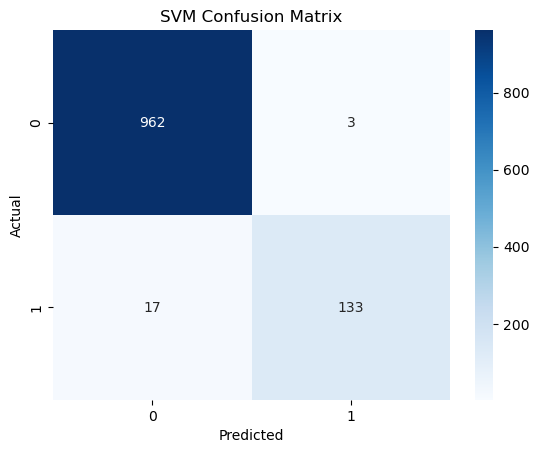

In [34]:
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print("Classification Report:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost Classifier:
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:


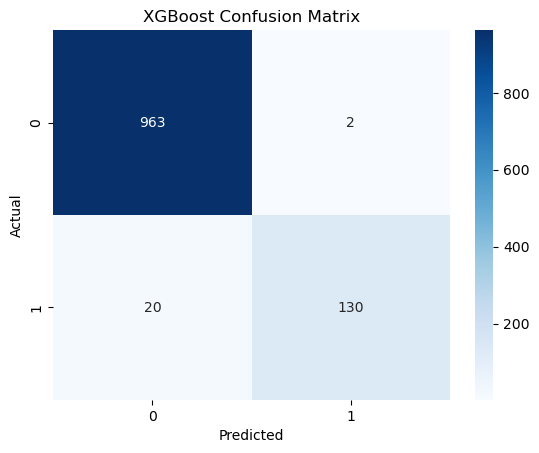

In [35]:
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
print("Classification Report:")
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CatBoost Classifier:
Accuracy: 0.9757847533632287
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Confusion Matrix:


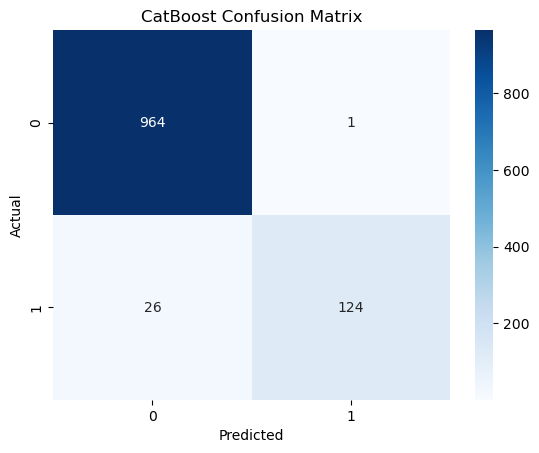

In [36]:
print("CatBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, catboost_pred)}")
print("Classification Report:")
print(classification_report(y_test, catboost_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, catboost_pred), annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier:
Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.79      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:


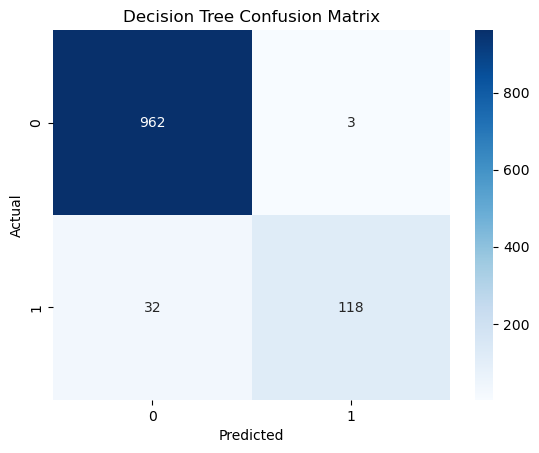

In [37]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print("Classification Report:")
print(classification_report(y_test, dt_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Classifier:
Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:


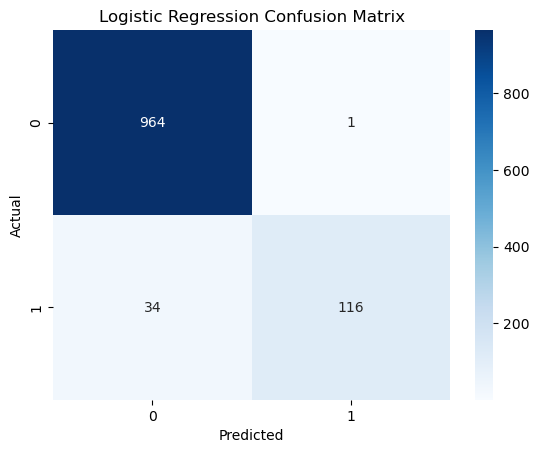

In [38]:
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()